In [76]:
#import librairies
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns


In [77]:
#load data
df = pd.read_csv("titanic-passengers.csv", sep=";")
print("/n df : ", df)

/n df :       PassengerId Survived  Pclass  \
0            343       No       2   
1             76       No       3   
2            641       No       3   
3            568       No       3   
4            672       No       1   
..           ...      ...     ...   
886           10      Yes       2   
887           61       No       3   
888          535       No       3   
889          102       No       3   
890          428      Yes       2   

                                                  Name     Sex   Age  SibSp  \
0                           Collander, Mr. Erik Gustaf    male  28.0      0   
1                              Moen, Mr. Sigurd Hansen    male  25.0      0   
2                               Jensen, Mr. Hans Peder    male  20.0      0   
3          Palsson, Mrs. Nils (Alma Cornelia Berglund)  female  29.0      0   
4                               Davidson, Mr. Thornton    male  31.0      1   
..                                                 ...     ...   ...    

In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    object 
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(4), object(6)
memory usage: 83.7+ KB


In [79]:
df.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [80]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [81]:
mean_age = round(df["Age"].mean())
print("\n mean age = ", mean_age)


 mean age =  30


In [82]:
df_clean = df
df_clean["Age"].fillna(mean_age, inplace=True)
df_clean

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,NaN,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,NaN,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,NaN,S
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,10,Yes,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
887,61,No,3,"Sirayanian, Mr. Orsen",male,22.0,0,0,2669,7.2292,NaN,C
888,535,No,3,"Cacic, Miss. Marija",female,30.0,0,0,315084,8.6625,NaN,S
889,102,No,3,"Petroff, Mr. Pastcho (""Pentcho"")",male,30.0,0,0,349215,7.8958,NaN,S


In [83]:
df_clean["Embarked"].value_counts()
df_clean["Embarked"].fillna("S", inplace= True)

In [84]:
#df["Survived"]= df["Survived"].map({"Yes":1, "No":0})  ==> that returns NaN instead of 0 or 1

In [85]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df_clean["Survived"]=encoder.fit_transform(df_clean["Survived"]) #0:No, 1:Yes
df_clean["Sex"]=encoder.fit_transform(df_clean["Sex"])  #1: male, 0:Female
#df_clean

In [86]:
#specify X and Y
X= df_clean[["Sex", "Age"]]
Y= df_clean["Survived"]
#splitting
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=10)

In [87]:
logReg = LogisticRegression()
logReg.fit(x_train, y_train)
predict = logReg.predict(x_test)

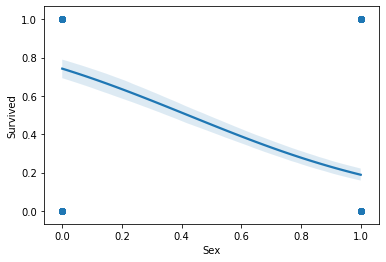

In [88]:
sns.regplot(X["Sex"], Y, logistic=True)

In [89]:
#metrics
print("accuracy= {}%".format(logReg.score(x_test,y_test)))

accuracy= 0.7982062780269058%


In [90]:
#Confusion matrix
tn, fp, fn, tp = confusion_matrix(y_test, predict).ravel()
print("\n confusion_matrix(y_test, predict) = ", confusion_matrix(y_test, predict))


 confusion_matrix(y_test, predict) =  [[116  17]
 [ 28  62]]


In [91]:
#report
from sklearn.metrics import classification_report
print(classification_report(y_test,predict))


              precision    recall  f1-score   support

           0       0.81      0.87      0.84       133
           1       0.78      0.69      0.73        90

    accuracy                           0.80       223
   macro avg       0.80      0.78      0.79       223
weighted avg       0.80      0.80      0.80       223



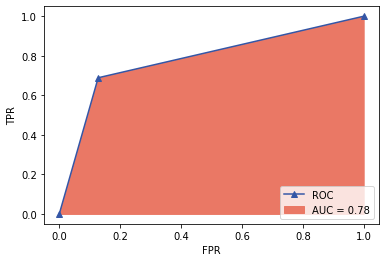

In [92]:
#ROC & AUC

fpr,tpr,thresholds=roc_curve(y_test,predict)
auc_logs=auc(fpr,tpr)
plt.plot(fpr,tpr,color='#3456A6',marker="^", label="ROC" % auc_logs)
plt.fill_between(fpr,tpr,color="#EA7865",label="AUC = %0.2f" % auc_logs)
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.legend(loc="lower right")
plt.show()